<h1>Проект по теме "Машинное обучение"

<h2>Описание проекта

<br>Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.</br>
<br>Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.</br>
<br>Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.</br>
<br>Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.</br>
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.
<br>А именно:
* научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
* сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
* проанализировать основные признаки, наиболее сильно влияющие на отток;
* сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
 <br>1) выделить целевые группы клиентов;</br>
 <br>2) предложить меры по снижению оттока;</br>
 <br>3) определить другие особенности взаимодействия с клиентами.</br>

<h2>Выполнение проекта

Выполнение заданий по проекту разбито на 4 этапа.

## Шаг 1. Загрузите данные

<i>«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:
Данные клиента за предыдущий до проверки факта оттока месяц:
* `gender` — пол;
* `Near_Location` — проживание или работа в районе, где находится фитнес-центр;
* `Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* `Phone` — наличие контактного телефона;
* `Age` — возраст;
* `Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах).
Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
* `Contract_period` — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
* `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах);
* `Group_visits` — факт посещения групповых занятий;
* `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента;
* `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;
* `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
* `Churn` — факт оттока в текущем месяце.

Начнем с загрузки библиотек, необходимых для работы.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram 
from sklearn.model_selection import train_test_split
import sklearn.metrics as skmt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans                       # Загрузка библиотек       
import warnings                                          
warnings.filterwarnings('ignore')                        # Отключение предупреждений

Переходим к открытию файла и чтению данных.

In [6]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/gym_churn.csv')     # Чтение данных из файла
df.info()                                                                 # Просмотр структуры

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Согласно структуре, текстовых полей в датафрейме нет, преобразование типов данных перед обработкой не требуется. Выполним проверку на наличие пропусков.

In [7]:
df.isna().sum()                           # Просмотр количества пропусков

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

Пропусков нет. Проверим на наличие дубликатов.

In [8]:
df.duplicated().sum()                  # Количество найденных дубликатов

0

Явные дублированные строки не обнаружены. Просмотрим первые 5 строк датафрейма для визуальной оценки данных.

In [9]:
df.head()                              # Первые 5 строк датафрейма

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Проверка качества данных перед EDA завершена. 

## Шаг 2. Проведите исследовательский анализ данных (EDA)

<br><i>
* Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe());
* Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby());
* Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);
* Постройте матрицу корреляций и отобразите её.

На этом этапе сначала посмотрим описание датафрейма.

In [11]:
df.describe()                          # Описание датафрейма

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Исходя из описания можно выделить следующие моменты:
* количество клиентов разных полов примерно одинаковое;
* большинство клиентов (почти 85 процентов) живет поблизости;
* почти половина клиентов пришла из компаний-партнеров;
* промокод по акции активировали только 30 процентов клиентов;
* большинство указали номер телефона;
* большая часть клиентов заключила контракт только на полгода;
* меньше половины ходят на групповые занятия;
* средний возраст клиента - 29 лет;
* средний чек по дополнительным услугам - 147 рублей;
* у более чем половины клиентов через месяц истекает договор;
* большая часть клиенов пришла в течение последних 5 месяцев;
* в среднем каждый клиент приходит 2 дня в месяц;
* частота посещений за предыдущий месяц - 2,5 раза;
* 26 процентов клиентов уже закрыли договор.

### Разделение датафрейма

Выполним разбиение на группы по основным небинарным признакам, чтобы выявить разницу между средними значениями в разных группах. Перечислим таковые признаки и напомним их значение:
* `Age` — возраст;
* `Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах);
* `Contract_period` — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
* `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах);
* `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента;
* `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;
* `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.

Для удобства выделения бинарных и небинарных признаков сформируем списки с названиями столбцов исходного датафрейма.

In [12]:
nbin_features = ['Age','Lifetime','Contract_period','Month_to_end_contract',
                 'Avg_class_frequency_total','Avg_class_frequency_current_month',
                 'Avg_additional_charges_total']                                    
                                                         # Список с назаниями столбцов с небинарными значениями
    
bin_features = ['gender','Near_Location','Partner','Promo_friends',
                'Phone','Group_visits','Churn']
                                                         # Список с назаниями столбцов с бинарными значениями

Выполним группировку по небинарным признакам с указанием средних значений по признаку действия договора.

In [13]:
churn_grouped = df.groupby('Churn',as_index=False).agg({
    'Age':'mean',
    'Lifetime':'mean',
    'Contract_period':'mean',
    'Month_to_end_contract':'mean',
    'Avg_class_frequency_total':'mean',
    'Avg_class_frequency_current_month':'mean',
    'Avg_additional_charges_total':'mean'})               # Группировка по основным признакам
display(churn_grouped)                                    # Просмотр результата

,Churn,Age,Lifetime,Contract_period,Month_to_end_contract,Avg_class_frequency_total,Avg_class_frequency_current_month,Avg_additional_charges_total
0,0,29.976523,4.711807,5.747193,5.283089,2.024876,2.027882,158.445715
1,1,26.989632,0.990575,1.728558,1.662582,1.474995,1.044546,115.082899


Судя по полученным данным, клиенты закрывали в основном краткосрочные контракты и ходили реже, чем оставшиеся клиенты. Кроме того, у закрывших договор клиентов средний чек по дополнительным услугам ниже.

In [14]:
stay_df = df.query('Churn == 0')                    # Выделение записей с активными клиентами 
display(len(stay_df))                               # Просмотр длины датафрейма

2939

Теперь можно посмотреть описание срезов данных только по бинарным признакам с исключением столбца `Churn`, по которому выполнялся запрос для разделения.

In [15]:
stay_df.drop(nbin_features+['Churn'],axis = 1).describe()      # Описание по датафрейму с данными активных клиентов

,gender,Near_Location,Partner,Promo_friends,Phone,Group_visits
count,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000
mean,0.510037,0.873086,0.534195,0.353522,0.903709,0.464103
std,0.499984,0.332933,0.498914,0.478144,0.295040,0.498795
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Затем выделим данные по небинарным признакам из того же датафрейма с данными по активным клиентам. 

In [17]:
stay_df.drop(bin_features,axis = 1).describe()                  # Описание среза датафрейма по небинарным признакам 

,Contract_period,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
count,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000
mean,5.747193,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
std,4.716942,3.009933,99.801599,4.363522,3.874780,1.016006,1.018994
min,1.000000,19.000000,0.171862,1.000000,0.000000,0.000000,0.000000
25%,1.000000,28.000000,76.920993,1.000000,2.000000,1.283137,1.297021
50%,6.000000,30.000000,149.881171,6.000000,4.000000,2.043252,2.046697
75%,12.000000,32.000000,224.448274,10.000000,6.000000,2.732944,2.740648
max,12.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783


Теперь сформируем датафрейм с данными по клиентам, уже закрывшим договор.

In [18]:
churn_df = df.query('Churn == 1')                   # Запрос по клиентам закрывшим договор
display(len(churn_df))                              # Просмотр длины датафрейма

1061

Просмотрим описание датафрейма `churn_df` только по бинарным признакам.

In [19]:
churn_df.drop(nbin_features+['Churn'],axis = 1).describe()     # Описание среза датафрейма по бинарным признакам

,gender,Near_Location,Partner,Promo_friends,Phone,Group_visits
count,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000
mean,0.510839,0.768143,0.355325,0.183789,0.902922,0.268615
std,0.500118,0.422217,0.478837,0.387495,0.296204,0.443448
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
churn_df.drop(bin_features,axis = 1).describe()                # Описание среза датафрейма по бинарным признакам

,Contract_period,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
count,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000
mean,1.728558,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546
std,2.132371,2.895163,77.696419,1.964593,1.110799,0.694705,0.770237
min,1.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000
25%,1.000000,25.000000,50.629127,1.000000,0.000000,1.010771,0.421337
50%,1.000000,27.000000,103.814686,1.000000,1.000000,1.491187,0.979445
75%,1.000000,29.000000,165.616858,1.000000,1.000000,1.956438,1.588576
max,12.000000,38.000000,425.535220,12.000000,9.000000,3.478646,3.540271


### Построение диаграмм

Для сравнения данных в двух датафреймах формирование столбчатых диаграмм будет выполняться с помошью специальной функции `dual_plot`. В качестве входных данных она будет использовать указанный название столбца с количеством корзин и наименованиями осей. Эта функция оформлена таким образом, что на ней будут параллельно отображаться 2 гистограммы с одинаковыми подписями осей, но левая будет отображать распределение по действующим договорам, а правая - по закрытым.

In [22]:
def dual_plot(col,nbins=10,xname='X',yname='Y'):           # Функция построения диаграмм по двум датафреймам
    plt.figure(figsize=(16,6))                                   # Исходный размер области для диаграмм       
    
    ax1=plt.subplot(1,2,1)                                       # Левая сторона с гистограммой по первому датафрейму
    plt.title('Активные клиенты')                                # Название датафрейма
    plt.hist(stay_df[col],bins=nbins,color='green')              # Построение гистограммы со столбцами зеленого цвета
    plt.xlabel(xname)                                            # Указание названия по оси X
    plt.ylabel(yname)                                            # Указание названия по оси Y
    
    ax2=plt.subplot(1,2,2)                                       # Правая сторона с гистограммой по второму датафрейму
    plt.title('Ушедшие клиенты')                                 # Название датафрейма
    plt.hist(churn_df[col],bins=nbins,color='red')               # Построение гистограммы со столбцами красного цвета
    plt.xlabel(xname)                                            # Указание названия по оси X
    plt.ylabel(yname)                                            # Указание названия по оси Y

    plt.show()                                                   # Просмотр блока с гистограммами

Построим с помощью этой функции гистограммы с распределением по возрастам, чтобы сравнить результаты по разным датафреймам и определить разницу между этими двумя категориями клиентов. Далее будем сравнивать категории клиентов только по небинарным признакам, так как количество различных значений в них даст более информативную картину по категориям клиентов.

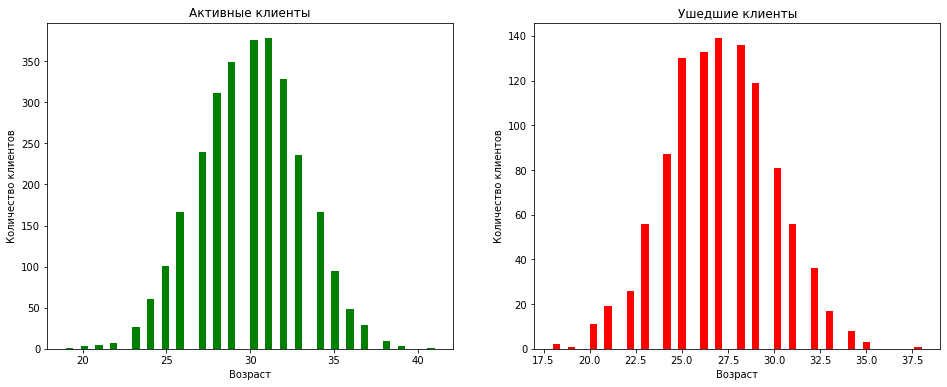

In [23]:
dual_plot('Age',50,'Возраст','Количество клиентов')         # Построение блока с гистограммами

<b>Вывод: наибольшая доля клиентов имеет возраст от 22 до 35 лет, причем как среди активных клиентов, так и среди покинувших. 

Теперь построим гистограммы распределения по длительности посещений клиентов.

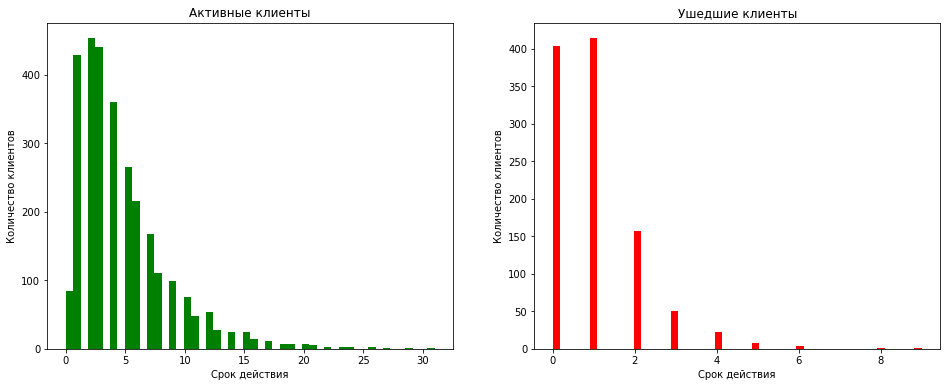

In [25]:
dual_plot('Lifetime',50,'Срок действия','Количество клиентов')       # Построение блока с гистограммами

<b>Вывод: большинство покинувших клиентов расторгли договор в течение 3 месяцев после заключения. Большинство клиентов заключило договоры в течение последнего года.

Посмотрим сроки действия заключенных и расторгнутых договоров.

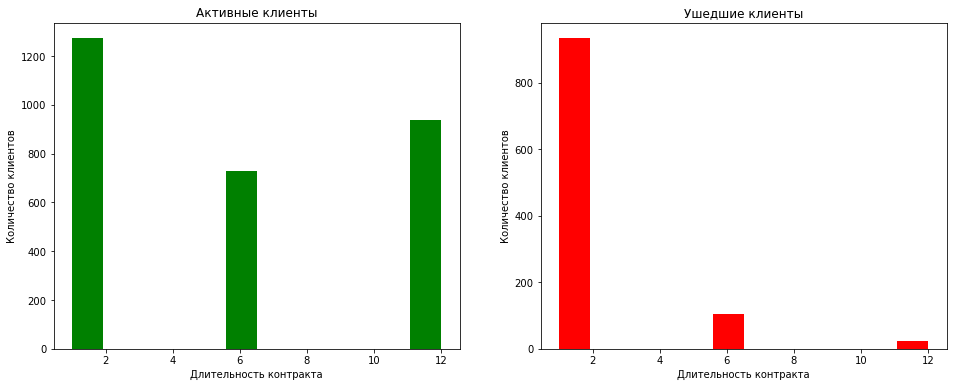

In [26]:
dual_plot('Contract_period', 12,'Длительность контракта','Количество клиентов')     # Построение блока с гистограммами

<b>Вывод: большая часть расторгнутых договоров была заключена на 1 месяц. Чем больше срок договора, тем выше вероятность того, что человек будет продолжать занятия.

Теперь можно построить гистограмму по оставшимся срокам действия заключенных контрактов.

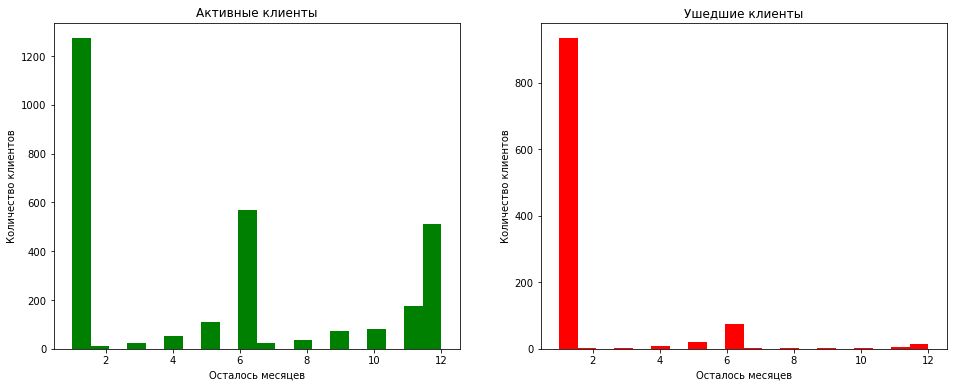

In [27]:
dual_plot('Month_to_end_contract', 20,
          'Осталось месяцев','Количество клиентов')              # Построение блока с гистограммами

<b>Вывод: клиенты чаще всего расторгали договор в последний месяц их действия. 

Сравним гистограммы по частоте посещения клиентов из разных категорий.

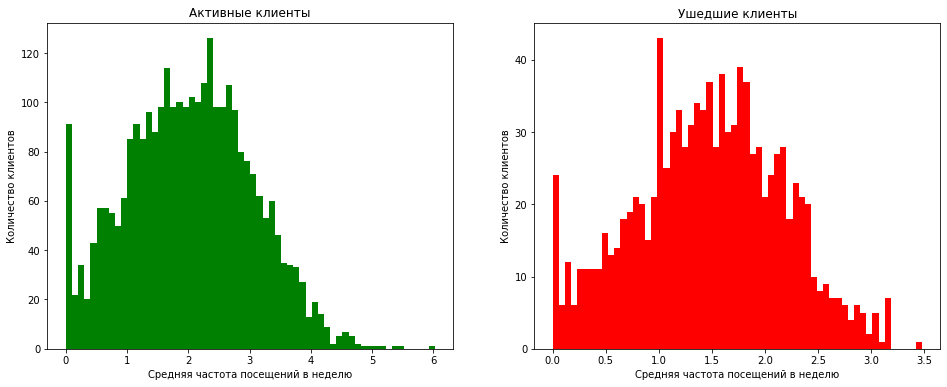

In [29]:
dual_plot('Avg_class_frequency_total', 60,
          'Средняя частота посещений в неделю','Количество клиентов')              # Построение блока с гистограммами

<b>Вывод: если не обращать внимание на группу клиентов, которая не приходила на занятия вообще, то можно заметить, что расторгнувшие договор клиенты ходили на занятия реже, чем активные.

Сравним активность за последний месяц среди клиентов по следующим гистограммам. 

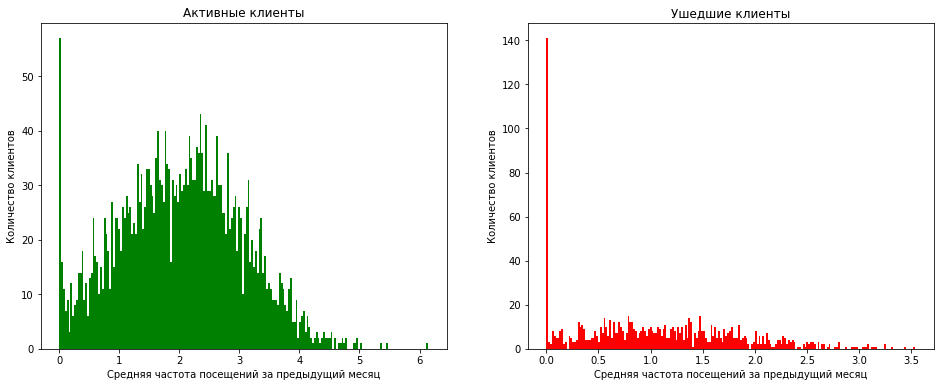

In [30]:
dual_plot('Avg_class_frequency_current_month', 200,
          'Средняя частота посещений за предыдущий месяц','Количество клиентов')     # Построение блока с гистограммами

<b>Вывод: клиенты, расторгувшие договор, перестали приходить на занятия (а может быть, даже не приходили на них вообще). Статистика посещений среди активных клиентов почти не поменялась, и поскольку среди активных клиентов также есть такие, которые не приходили на занятия, данный признак не дает гарантий, что человек расторгнет договор.

Дополнительно сравним категории клиентов по расходам на дополнительные услуги.

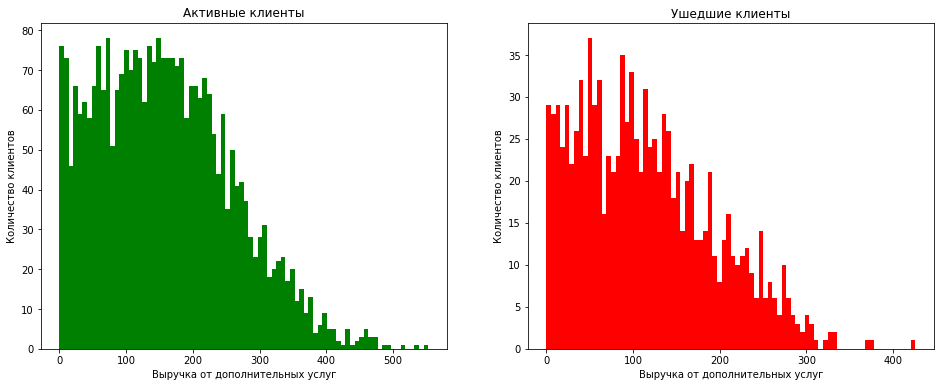

In [31]:
dual_plot('Avg_additional_charges_total', 80,
          'Выручка от дополнительных услуг','Количество клиентов')     # Построение блока с гистограммами

<b>Вывод: расходы по всем клиентам на дополнительные услуги между категориями меняются незначительно. Однако у активных клиентов чек за эти услуги может быть выше 400 рублей.

### Анализ корреляции

Рассчитаем по полному датафрейму матрицу корреляций по всем столбцам для поиска взаимосвязим между столбцами, затем построим на ее основе тепловую карту.

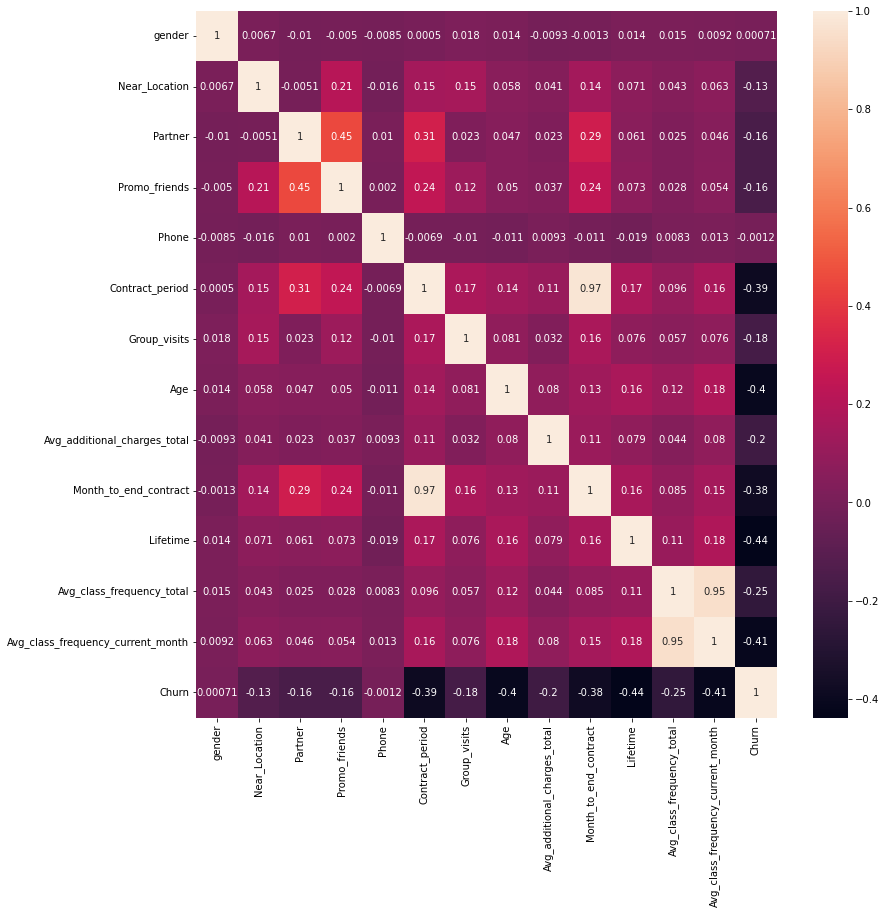

In [32]:
mtrx = df.corr()                               # Создание матрицы корреляций
plt.figure(figsize=(13,13))                    # Размер тепловой карты
sns.heatmap(mtrx,annot=True)                   # Построение тепловой карты
plt.show()                                     # Просмотр тепловой карты

<b>Вывод: данные в столбцах `Phone` и `gender` имеют чрезвычайно слабую корреляцию с данными в остальных столбцах.

Кроме признаков со слабой корреляцией была также обнаружена мультиколлинеарность по некоторым признакам, у которых есть зависимость друг от друга, например: сроки договора и оставшееся время действия договора, средняя частота посещений в прошлом месяце и средняя частота посещений за весь период.
<p> Однако если исключить эти данные, то по причине большого количества бинарных признаков могут снизиться качество модели и точность прогноза, поэтому оставим эти данные для дальнейшей работы (несмотря на риск переобучения).

## Шаг 3. Постройте модель прогнозирования оттока клиентов

<i>Постройте модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:<br>
Разбейте данные на обучающую и валидационную выборку функцией train_test_split().
Обучите модель на train-выборке двумя способами:
* логистической регрессией,
* случайным лесом.<br></br>
<br><i>Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?
Не забудьте указать параметр `random_state` при разделении выборки и задании алгоритма.

Перед тем, как выбрать более точную модель, разделим данные с выделением целевых переменных и сформируем из полученных данных обучающую и валидационную выборки для последующего обучения модели.

In [33]:
X = df.drop(['Churn'],axis=1)                                # Исходные данные для модели
y = df['Churn']                                              # Целевые переменные
X_train, X_test, y_train, y_test = train_test_split(         
    X, y, test_size=0.2, random_state=0)                     # Формирование данных для модели

Определим метрики по разным типам модели для сравнения точности модели и выбора подходящей модели. Начнем с определения метрик по модели логистической регрессии.

In [34]:
lr_model = LogisticRegression(solver='liblinear')            # Указание модели 
lr_model.fit(X_train,y_train)                                # Построение модели
y_pred0 = lr_model.predict(X_test)                           # Предсказанные данные

lr_acc = skmt.accuracy_score(y_test,y_pred0)                 # Доля правильных ответов по модели
lr_prc = skmt.precision_score(y_test,y_pred0)                # Точность модели
lr_rcl = skmt.recall_score(y_test,y_pred0)                                                      # Полнота по модели
display('Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}'.format(lr_acc,lr_prc,lr_rcl))     # Вывод метрик

'Accuracy: 0.93, Precision: 0.86, Recall: 0.83'

После этого выполним расчет аналогичных метрик по типу модели "случайный лес".

In [35]:
rf_model = RandomForestClassifier(random_state=0)            # Указание модели с параметрами
rf_model.fit(X_train,y_train)                                # Построение модели
y_pred1 = rf_model.predict(X_test)                           # Предсказанные данные

rf_acc = skmt.accuracy_score(y_test,y_pred1)                 # Доля правильных ответов по модели
rf_prc = skmt.precision_score(y_test,y_pred1)                # Точность модели
rf_rcl = skmt.recall_score(y_test,y_pred1)                                                      # Полнота по модели
display('Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}'.format(rf_acc,rf_prc,rf_rcl))     # Вывод метрик

'Accuracy: 0.92, Precision: 0.84, Recall: 0.82'

<b>Вывод: исходя из полученных метрик, метод логистической регрессии более подходит для прогнозирования оттока. 

## Шаг 4. Сделайте кластеризацию клиентов

<i>Отложите в сторону столбец с оттоком и проведите кластеризацию объектов (клиентов):
* Стандартизируйте данные.
* Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположите, какое количество кластеров можно выделить.
* Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов. Однако, конечно, в жизни никто не скажет вам правильный ответ, и решение остаётся за вами (на основании изучения графика из предыдущего пункта).
* Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?
* Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?
* Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

Выполним стандартизацию данных и сформируем матрицу расстояний.

In [36]:
scaler = StandardScaler()                             # Выбор модели стандартизации
x_sc = scaler.fit_transform(X_test)                   # Стандартизация тестовой выборки для создания матрицы расстояний

Затем создадим матрицу признаков и на ее основу построим дендрограмму.

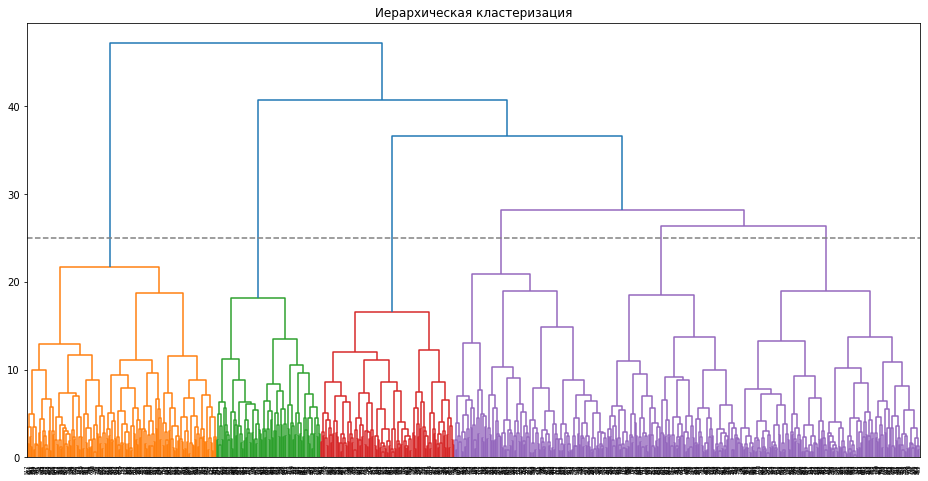

In [37]:
ddg = linkage(x_sc,'ward')                            # Построение матрицы признаков
plt.figure(figsize=(16,8))                            # Размер дендрограммы
plt.title('Иерархическая кластеризация')              # Название дендрограммы
plt.axhline(y=25,linestyle='--',color='grey')         # Горизонтальная граница для определения числа кластеров
vdg = dendrogram(ddg)                                 # Построение дендрограммы
plt.show()                                            # Отображение дендрограммы

<b>Вывод: согласно результату кластеризации оптимально можно будет выделить 6 кластеров.

После этого выполним кластеризацию по методу K-Means с указанием количества кластеров, равному 5.

In [38]:
X_sc = scaler.fit_transform(X)                       # Стандартизация полного датафрейма
km = KMeans(n_clusters=5, random_state=0)            # Выбор медота кластеризации и его параметров
labels = km.fit_predict(X_sc)                        # Применение метода с формированием вектора кластеров

Посмотрим метрику силуета по полученной матрице признаков и меток.

In [39]:
skmt.silhouette_score(X_sc,labels)                   # Просмотр метрики силуэта

0.14140953623023353

<b>Вывод: метрика силуэта далека от целевого показателя единицы, что позволяет предположить отсутствие явного разделения между клиентами, чтобы сделать достаточно точное предположение о том, останется ли клиент или расторгнет договор.

Перед отображением диаграмм распределения добавим метки кластеров в исходный датафрейм.

In [40]:
df['cluster_km'] = labels                            # Добавление столбца с метками кластера

Отобразим визуально распределение между различными кластерами и признаками. Для удобства создадим специальную функцию `dual_dim_plot`, с помощью которой можно просмотреть диаграммы рассеяний между двумя признаками по разным кластерам.

In [41]:
def dual_dim_plot(data, x_name, y_name):                   # Функция для отображения диаграммы рассеяния
    plt.figure(figsize=(10, 5))                            # Размер диаграммы
    sns.scatterplot(                                                              # Диаграмма рассеяния
        data[x_name], data[y_name], hue=df['cluster_km'], palette='Paired')       # Параметры диаграммы
    plt.title('{} vs {}'.format(x_name, y_name))                                  # Название диаграммы с признаками
    plt.show()                                                                    # Отображение диаграммы

Поскольку диаграммы рассеяния работают с двумя признаками, можно исключить бинарные признаки, так как по ним точки на диаграмме по разным кластерам будут сливаться на разных сторонах диаграммы и визуально будет сложно разобрать распределение большого числа клиентов по кластерам. Также это позволить сократить количество комбинаций пар признаков без значительной утраты информативности результатов сравнения кластеров. 

In [42]:
needless = bin_features + ['cluster_km']    # Список столбцов для исключения с небинарными признаками и номерами кластеров 
col_pairs = list(itertools.combinations(
    df.drop(needless, axis=1).columns, 2))               # Массив с комбинациями пар разных столбцов
display(len(col_pairs))                                  # Размер массива

21

Всего создана 21 пара с признаками, которую можно использовать для отображения диаграмм через цикл по ним.

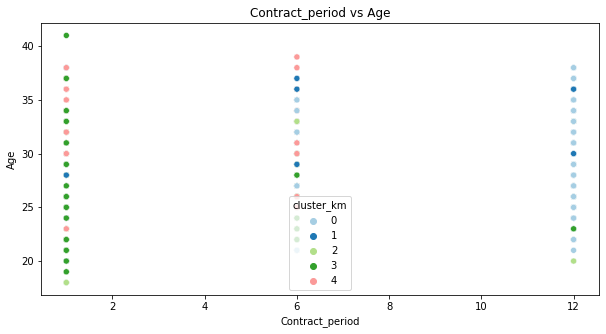

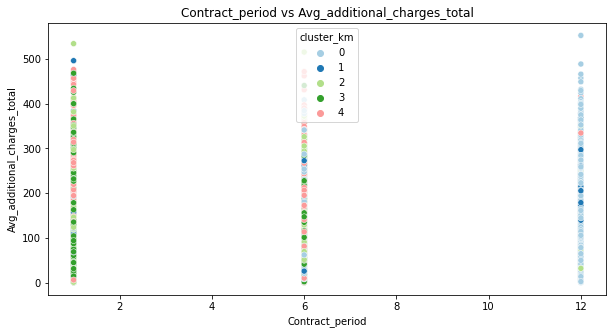

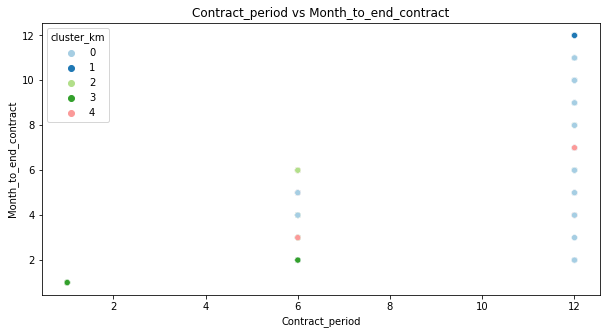

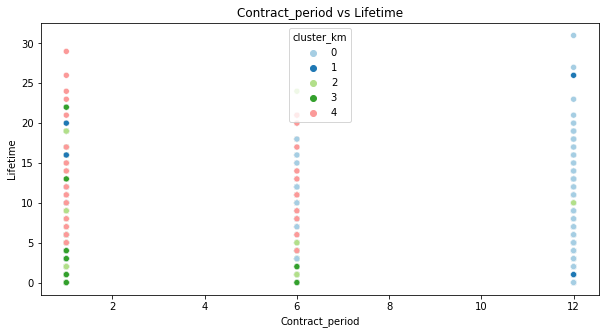

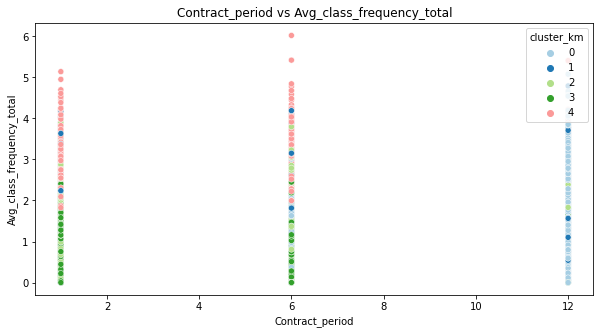

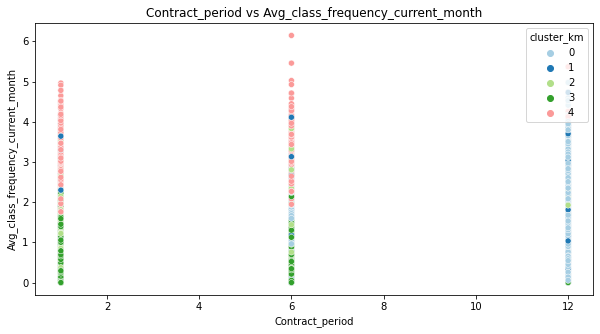

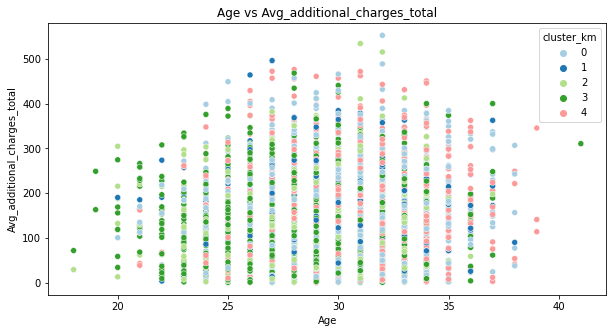

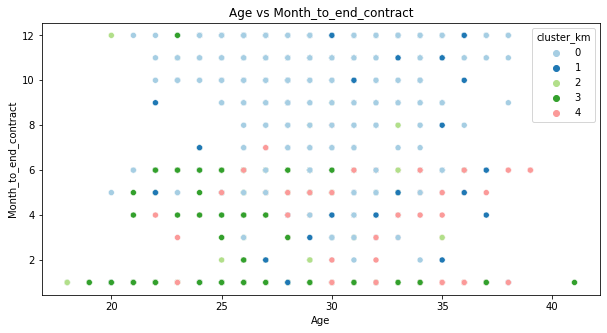

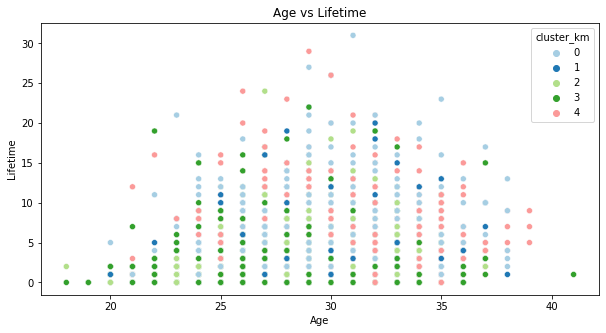

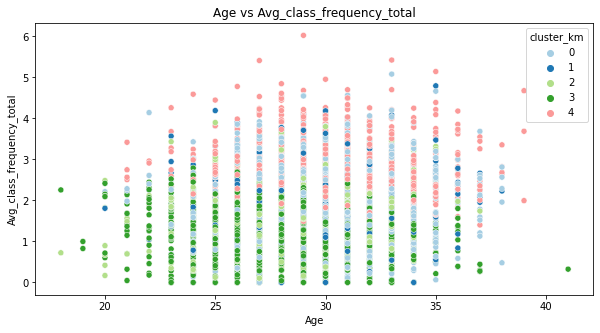

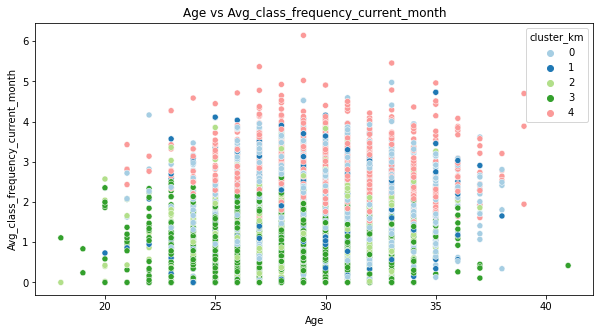

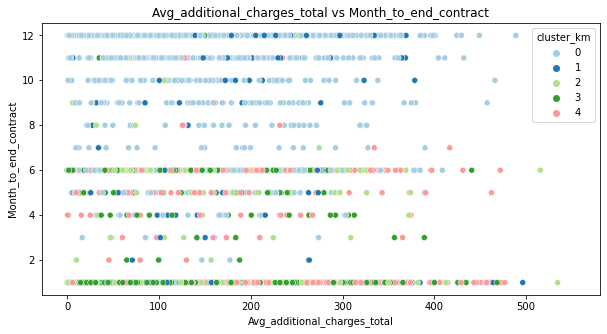

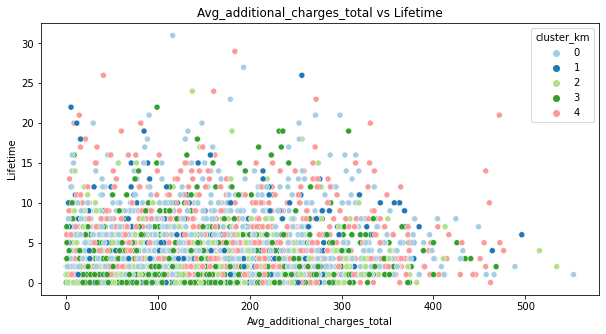

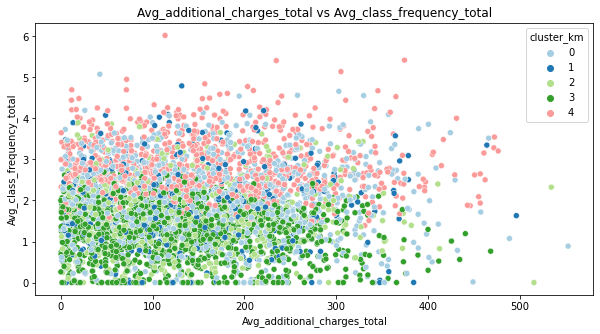

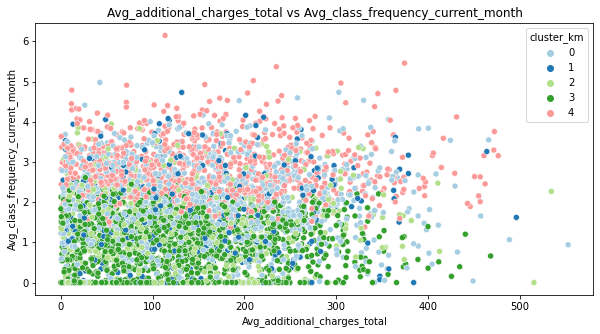

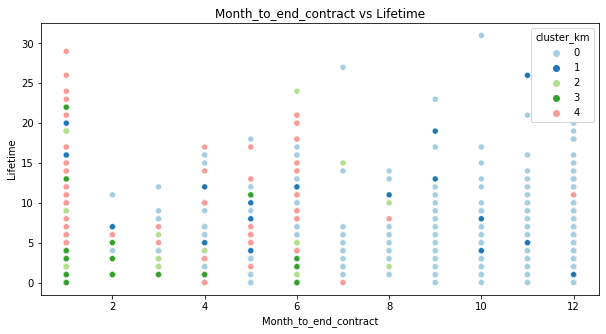

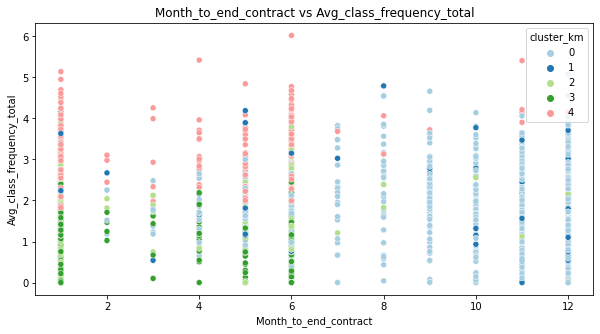

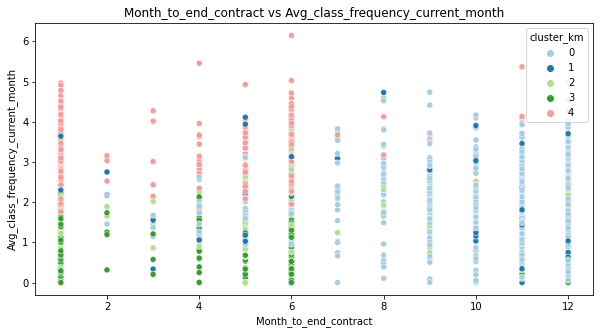

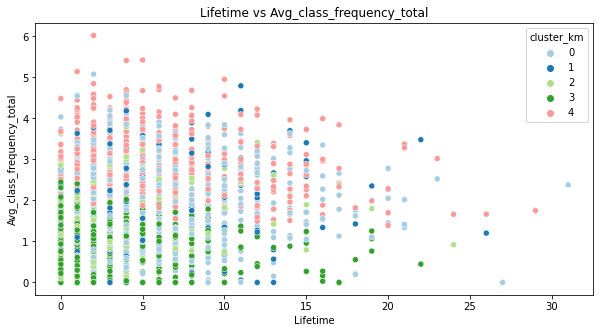

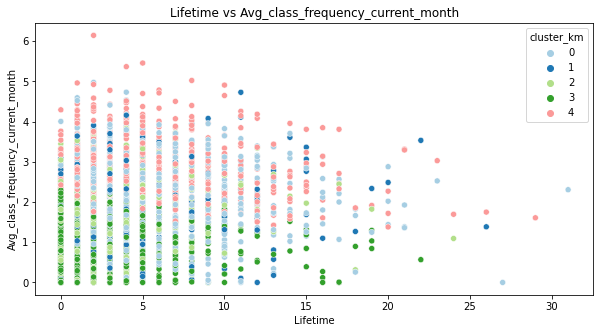

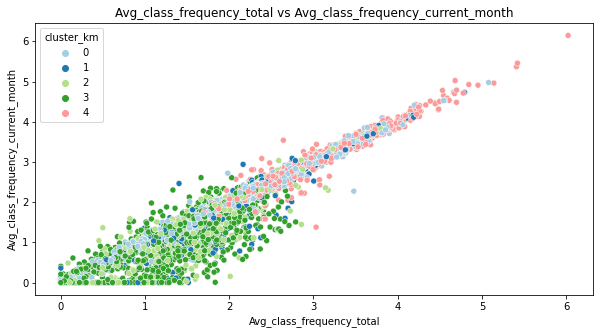

In [43]:
for pair in col_pairs:                                    # Цикл по парам признаков
    dual_dim_plot(df, pair[0], pair[1])                   # Диаграмма рассеяния по признакам из пары 

<b>Вывод: зависимость по вероятности оттока многофакторная. Кластеры не имеют четкого разделения по многим сравниваемым признакам. Тем не менее, зависимость дальнейшего поведения клиента от некоторых признаков все же прослеживается.

Посмотрим также средние значения по кластерам.

In [44]:
display(df.groupby('cluster_km').mean())              # Группировка по меткам кластера

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


<b>Вывод: кластеры делятся по разным уровням вероятности оттока. При анализе была выявлена зависимость между факторами близости расположения, длительностью действия договора, сроком договора, тратами на дополнительные услуги и частотой посещений. Клиенты из кластеров 0 и 4, скорее всего, продолжат ходить на занятия, а клиенты из кластеров 2 и 3 вполне вероятно могут расторгнуть договор.

## Общий вывод

<p>Согласно результатам многостороннего анализа данных по клиентам удалось выявить некоторые признаки, которые можно использовать для формирования прогноза поведения клиентов и определить некоторую вероятность того, продолжит ли клиент посещать занятия или нет.</p>

Клиент скорее всего останется, если он:
* часто приходит на групповые занятия;
* пришел от компании-партнера;
* заключил долгосрочный контракт или пролонгировал его ранее;
* существенно не сократил траты на дополнительные услуги;
* приходит заниматься 3 месяца и более;
* не сократил количество посещений в сравнении с предыдущим месяцем.

Соблюдение всех этих условий весьма убедительно демонстрирует лояльность клиента.

## Рекомендации

* Желательно предпринять меры по повышению лояльности клиентов, чтобы добиться повышения уровня посещаемости, поскольку многие клиенты не приходят на занятия совсем;
* Дополнительно можно увеличить ассортимент дополнительных услуг;
* Также рекомендуется добавить систему достижений для увеличения мотивации клиентов в достижении определенной цели.